## Description notebook:
### Use netcdf files and plot correlation functions and energy spectra as well as other useful diags (MKE and number of drifters)
These are mainly he figures used for the OSM20 poster

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import netCDF4 as nc

In [2]:
path = '/Users/zcaspar/codes/diags/diags/'
file = xr.open_dataset(path+'spectra_40.nc')
file2 = xr.open_dataset(path+'spectra_20.nc')
L_spectra = xr.open_dataset(path+'Lspectra40_tide.nc')
E_E = file.E_spectra
E_L = file.L_spectra

In [110]:
file.L_spectra.y_bins[51]

<xarray.DataArray 'y_bins' ()>
array(1545.)
Coordinates:
    y_bins        float64 1.545e+03
    s_rho_slice0  float32 ...

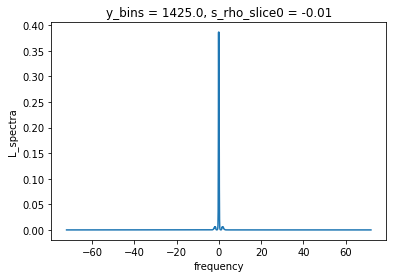

In [3]:
file.L_spectra.sel(y_bins=1425,method='nearest').plot.line(x='frequency')

In [12]:
i_y = [725,1250,1515,1790,2315]#[25,40,50,60,75]#
i_y1 = [17,37,47,57,77]
#print(E_E.sel(y_rho=E_L.y_bins[i_y]*1000,method='nearest').y_rho.values)
def fig_ELcomp(i,dataL,dataE,figsize,axis,figname,offline=False):
    #liste = []
    #for i in data.data_vars:
    #    liste.append(data[str(i)])
    E_E=dataE#liste[1]#data.E_spectra
    E_L = dataL #liste[0]#data.L_spectra
    fig = plt.figure(figsize=figsize)
    grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)
    ax = plt.subplot(grid[1,0])
    (E_E.sel(y_rho=i_y[2]*1000,method='nearest')).plot.line(ax=ax,c='b',
                                                                        label='Eulerian',yscale=axis['yscale'])
    (E_L.sel(y_bins=i_y[2],method='nearest')).plot.line(ax=ax,x=axis['axes'],xlim =axis['xlim'],ylim =axis['ylim'],c='r',
                                        label='Lagrangian',yscale=axis['yscale'])
    plt.legend()
    ax.set_title('y=%s km'%i_y[2]);ax.set_ylabel(axis['ylabel']);ax.set_xlabel(axis['xlabel'])
    ax = plt.subplot(grid[0,1])
    (E_E.sel(y_rho=i_y[0]*1000,method='nearest')).plot.line(ax=ax,c='b',
                                                                        label='Eulerian',yscale=axis['yscale'])
    (E_L.sel(y_bins=i_y[0],method='nearest')).plot.line(ax=ax,x=axis['axes'],xlim =axis['xlim'],ylim =axis['ylim'],c='r',
                                        label='Lagrangian',yscale=axis['yscale'])
    plt.legend()
    ax.set_title('y=%s km'%i_y[0]);ax.set_ylabel(axis['ylabel']);ax.set_xlabel(axis['xlabel'])
    ax = plt.subplot(grid[0,2])
    (E_E.sel(y_rho=i_y[1]*1000,method='nearest')).plot.line(ax=ax,c='b',
                                                                        label='Eulerian',yscale=axis['yscale'])
    (E_L.sel(y_bins=i_y[1],method='nearest')).plot.line(ax=ax,x=axis['axes'],xlim =axis['xlim'],ylim =axis['ylim'],c='r',
                                        label='Lagrangian',yscale=axis['yscale'])
    plt.legend()
    ax.set_title('y=%s km'%i_y[1]);ax.set_ylabel(axis['ylabel']);ax.set_xlabel(axis['xlabel'])
    ax = plt.subplot(grid[1,1])
    (E_E.sel(y_rho=i_y[3]*1000,method='nearest')).plot.line(ax=ax,c='b',
                                                                        label='Eulerian',yscale=axis['yscale'])
    (E_L.sel(y_bins=i_y[3],method='nearest')).plot.line(ax=ax,x=axis['axes'],xlim =axis['xlim'],ylim =axis['ylim'],c='r',
                                        label='Lagrangian',yscale=axis['yscale'])
    plt.legend()
    ax.set_title('y=%s km'%i_y[3]);ax.set_ylabel(axis['ylabel']);ax.set_xlabel(axis['xlabel'])
    ax = plt.subplot(grid[1,2])
    (E_E.sel(y_rho=i_y[4]*1000,method='nearest')).plot.line(ax=ax,c='b',
                                                                        label='Eulerian',yscale=axis['yscale'])
    (E_L.sel(y_bins=i_y[4],method='nearest')).plot.line(ax=ax,x=axis['axes'],xlim =axis['xlim'],ylim =axis['ylim'],c='r',
                                        label='Lagrangian',yscale=axis['yscale'])
    plt.legend()
    ax.set_title('y=%s km'%i_y[4]);ax.set_ylabel(axis['ylabel']);ax.set_xlabel(axis['xlabel'])
    if offline : 
        plt.savefig(figname)

/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/plot/utils.py:633: UserWarning: Attempted to set non-positive top ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(ylim)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/matplotlib/mathtext.py:2542: SyntaxWarning: Exception creating Regex for oneOf, building MatchFirst
  p.subsuperop    <<= oneOf(["_", "^"])


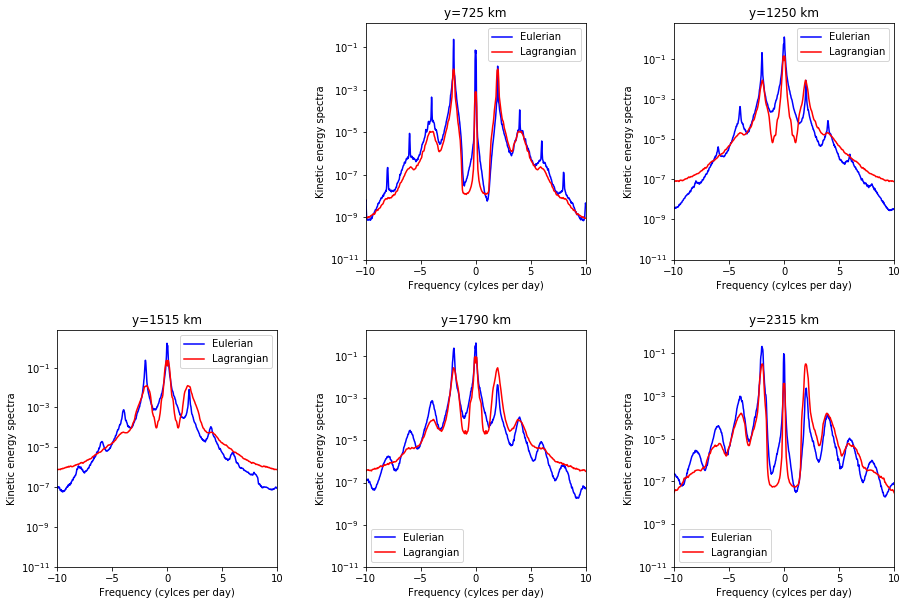

In [4]:
axis = {'axes' : 'frequency','xlim':(-10,10),'ylim':(1e-11,0),
        'ylabel':'Kinetic energy spectra','xlabel':'Frequency (cylces per day)','yscale':'log'}
fig_ELcomp(i_y,file.L_spectra,file.E_spectra,(15,10),axis,'',offline=False)

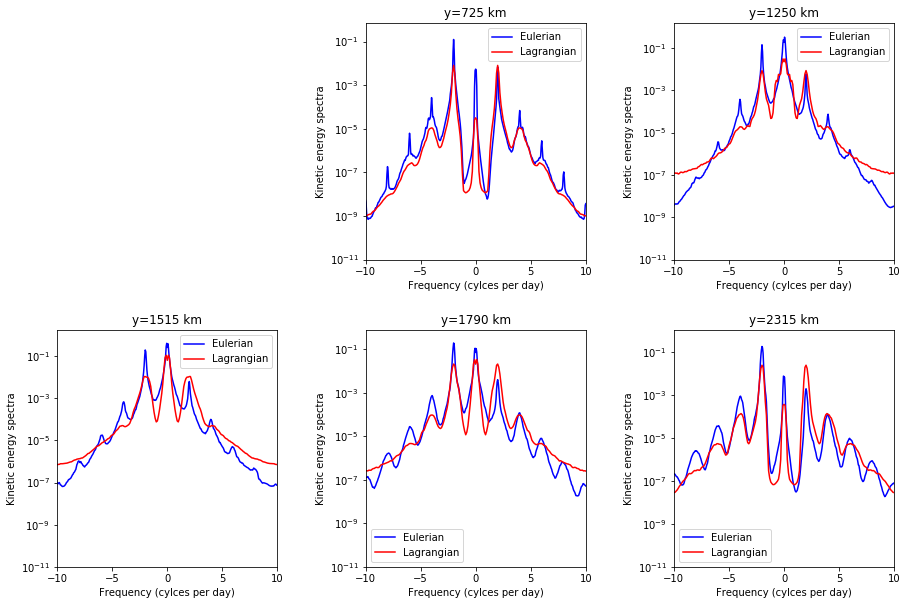

In [5]:
fig_ELcomp(i_y,file2.L_spectra,file2.E_spectra,(15,10),axis,'',offline=False)

In [4]:
from matplotlib import ticker
from matplotlib.colors import LogNorm

def genfig_Elat(bins,data,figsize,axis):
    data['y_rho'] = data.y_rho.values/1000
    fig = plt.figure(figsize=figsize)
    grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)
    ax = plt.subplot(grid[0,0])
    data.plot(norm=LogNorm(),xlim=axis['xlim'])#.contourf(locator=ticker.LogLocator())
    ax.set_title('')
    ax.axhline(c='k',linestyle='--',y=bins[0]);ax.axhline(c='k',linestyle='--',y=bins[1]);
    ax.axhline(c='k',linestyle='--',y=bins[2]);
    ax.axhline(c='k',linestyle='--',y=bins[3]);ax.axhline(c='k',linestyle='--',y=bins[4])
    ax.set_ylabel('y (km)');ax.set_xlabel(axis['xlabel'])
    ax = plt.subplot(grid[1,0])
    data.sel(y_rho=bins[2],method='nearest').plot.line(ax=ax,c='b',yscale=axis['yscale'],xlim=axis['xlim'],ylim=axis['ylim'])
    ax.set_title('y=%s km'%bins[2]);ax.set_ylabel(axis['ylabel']);ax.set_xlabel(axis['xlabel'])
    ax = plt.subplot(grid[0,1])
    (data.sel(y_rho=bins[0],method='nearest')).plot.line(ax=ax,c='b',
                                                             yscale=axis['yscale'],xlim=axis['xlim'],ylim=axis['ylim'])
    ax.set_title('y=%s km'%bins[0]);ax.set_ylabel(axis['ylabel']);ax.set_xlabel(axis['xlabel'])
    ax = plt.subplot(grid[0,2])
    (data.sel(y_rho=bins[1],method='nearest')).plot.line(ax=ax,c='b',
                                                            yscale=axis['yscale'],xlim=axis['xlim'],ylim=axis['ylim'])
    ax.set_title('y=%s km'%bins[1]);ax.set_ylabel(axis['ylabel']);ax.set_xlabel(axis['xlabel'])
    ax = plt.subplot(grid[1,1])
    (data.sel(y_rho=bins[3],method='nearest')).plot.line(ax=ax,c='b',
                                                              yscale=axis['yscale'],xlim=axis['xlim'],ylim=axis['ylim'])
    ax.set_title('y=%s km'%bins[3]);ax.set_ylabel(axis['ylabel']);ax.set_xlabel(axis['xlabel'])
    ax = plt.subplot(grid[1,2])
    (data.sel(y_rho=bins[4],method='nearest')).plot.line(ax=ax,c='b',
                                                            yscale=axis['yscale'],xlim=axis['xlim'],ylim=axis['ylim'])
    ax.set_title('y=%s km'%bins[4]);ax.set_ylabel(axis['ylabel']);ax.set_xlabel(axis['xlabel'])
    
def genfig_Llat(bins,data,figsize,axis):
    fig = plt.figure(figsize=figsize)
    grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)
    ax = plt.subplot(grid[0,0])
    data.plot(norm=LogNorm(),xlim=axis['xlim'])#.contourf(locator=ticker.LogLocator())
    ax.set_title('')
    ax.axhline(c='k',linestyle='--',y=bins[0]);ax.axhline(c='k',linestyle='--',y=bins[1]);
    ax.axhline(c='k',linestyle='--',y=bins[2]);
    ax.axhline(c='k',linestyle='--',y=bins[3]);ax.axhline(c='k',linestyle='--',y=bins[4])
    ax.set_ylabel('y (km)');ax.set_xlabel(axis['xlabel'])
    ax = plt.subplot(grid[1,0])
    data.sel(y_bins=bins[2],method='nearest').plot.line(ax=ax,c='b',yscale=axis['yscale'],xlim=axis['xlim'],ylim=axis['ylim'])
    ax.set_title('y=%s km'%bins[2]);ax.set_ylabel(axis['ylabel']);ax.set_xlabel(axis['xlabel'])
    ax = plt.subplot(grid[0,1])
    (data.sel(y_bins=bins[0],method='nearest')).plot.line(ax=ax,c='b',
                                                             yscale=axis['yscale'],xlim=axis['xlim'],ylim=axis['ylim'])
    ax.set_title('y=%s km'%bins[0]);ax.set_ylabel(axis['ylabel']);ax.set_xlabel(axis['xlabel'])
    ax = plt.subplot(grid[0,2])
    (data.sel(y_bins=bins[1],method='nearest')).plot.line(ax=ax,c='b',
                                                            yscale=axis['yscale'],xlim=axis['xlim'],ylim=axis['ylim'])
    ax.set_title('y=%s km'%bins[1]);ax.set_ylabel(axis['ylabel']);ax.set_xlabel(axis['xlabel'])
    ax = plt.subplot(grid[1,1])
    (data.sel(y_bins=bins[3],method='nearest')).plot.line(ax=ax,c='b',
                                                              yscale=axis['yscale'],xlim=axis['xlim'],ylim=axis['ylim'])
    ax.set_title('y=%s km'%bins[3]);ax.set_ylabel(axis['ylabel']);ax.set_xlabel(axis['xlabel'])
    ax = plt.subplot(grid[1,2])
    (data.sel(y_bins=bins[4],method='nearest')).plot.line(ax=ax,c='b',
                                                            yscale=axis['yscale'],xlim=axis['xlim'],ylim=axis['ylim'])
    ax.set_title('y=%s km'%bins[4]);ax.set_ylabel(axis['ylabel']);ax.set_xlabel(axis['xlabel'])
    
def ELcomparaison(bins,Edata,Ldata,figsize,axis,c,name,offline=False):
    figname = '/Users/zcaspar/codes/'+name
    
    E_E=Edata#liste[1]#data.E_spectra
    E_L = Ldata#liste[0]#data.L_spectra
    fig,ax = plt.subplots(figsize=figsize)
    (E_E.sel(y_rho=bins[2]*1000,method='nearest')).plot.line(ax=ax,c='b',yscale=axis['yscale'])
    (E_L.sel(y_bins=bins[2],method='nearest')).plot.line(ax=ax,x=axis['axes'],xlim =axis['xlim'],ylim =axis['ylim'],
                                                       c='r',yscale=axis['yscale'])
    (E_E.sel(y_rho=bins[0]*1000,method='nearest')/(c**2)).plot.line(ax=ax,c='b',yscale=axis['yscale'])
    (E_L.sel(y_bins=bins[0],method='nearest')/(c**2)).plot.line(ax=ax,x=axis['axes'],xlim =axis['xlim'],ylim =axis['ylim'],
                                                    c='r',yscale=axis['yscale'])
    (E_E.sel(y_rho=bins[1]*1000,method='nearest')/c).plot.line(ax=ax,c='b',yscale=axis['yscale'])
    (E_L.sel(y_bins=bins[1],method='nearest')/c).plot.line(ax=ax,x=axis['axes'],xlim =axis['xlim'],ylim =axis['ylim'],
                                                       c='r',yscale=axis['yscale'])
    (E_E.sel(y_rho=bins[3]*1000,method='nearest')*c).plot.line(ax=ax,c='b',yscale=axis['yscale'])
    (E_L.sel(y_bins=bins[3],method='nearest')*c).plot.line(ax=ax,x=axis['axes'],xlim =axis['xlim'],ylim =axis['ylim'],
                                                       c='r',yscale=axis['yscale'])
    (E_E.sel(y_rho=bins[4]*1000,method='nearest')*(c**2)).plot.line(ax=ax,c='b',
                                                                        label='Eulerian',yscale=axis['yscale'])
    (E_L.sel(y_bins=bins[4],method='nearest')*(c**2)).plot.line(ax=ax,x=axis['axes'],xlim =axis['xlim'],ylim =axis['ylim'],c='r',
                                        label='Lagrangian',yscale=axis['yscale'])
    plt.legend()
    ax.set_title('');ax.set_ylabel(axis['ylabel']);ax.set_xlabel(axis['xlabel'])
    ax.set_xticks(np.arange(-10,10,2));plt.grid(True)
 #   ax.text(11,E_L.sel(y_bins=bins[2]).mean().values*1425,'y=1425')
    if offline : 
        plt.savefig(figname)
        

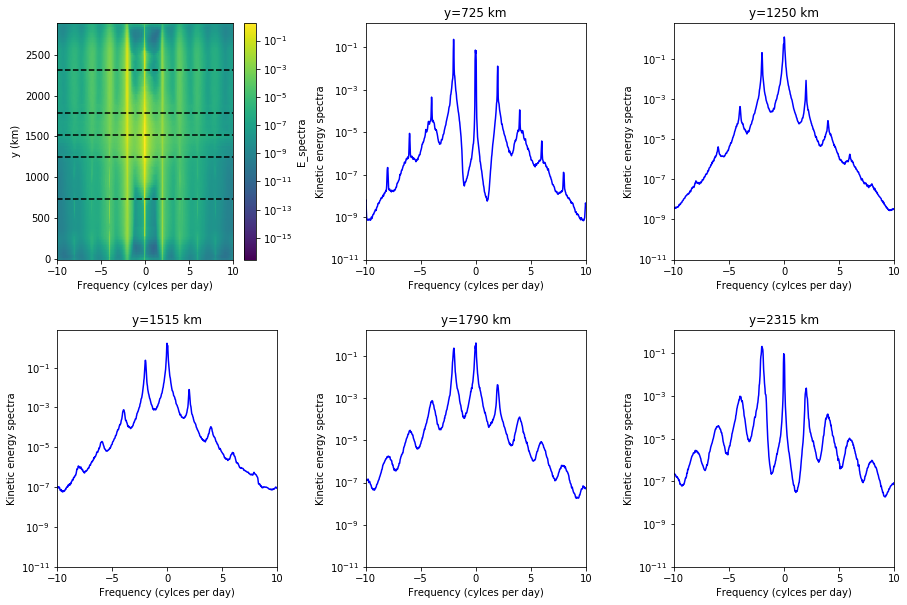

In [7]:
axis = {'axes' : 'frequency','xlim':(-10,10),'ylim':(1e-11,0),
        'ylabel':'Kinetic energy spectra','xlabel':'Frequency (cylces per day)','yscale':'log'}
genfig_Elat(i_y,file.E_spectra,(15,10),axis)

/opt/anaconda3/envs/croco/lib/python3.7/site-packages/matplotlib/colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


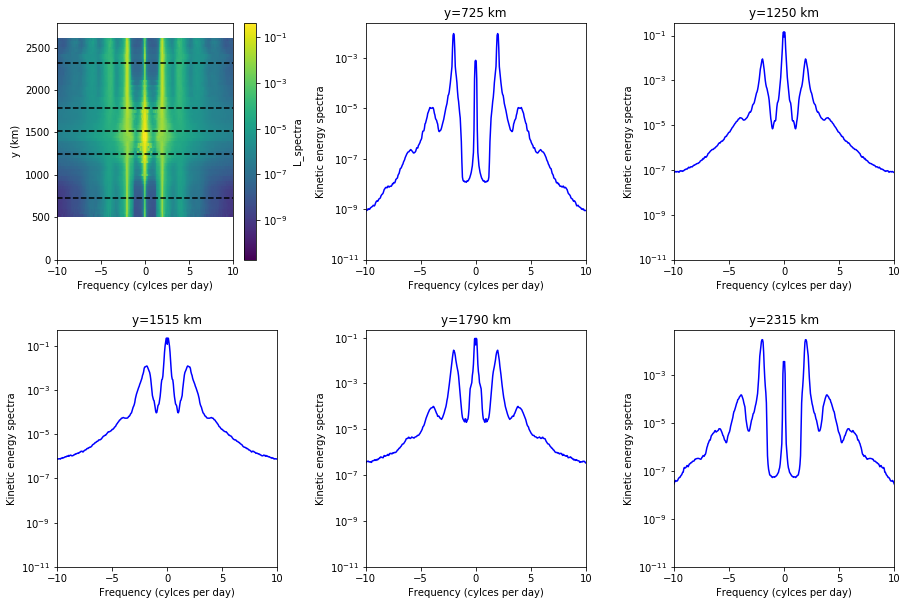

In [8]:
genfig_Llat(i_y,file.L_spectra,(15,10),axis)

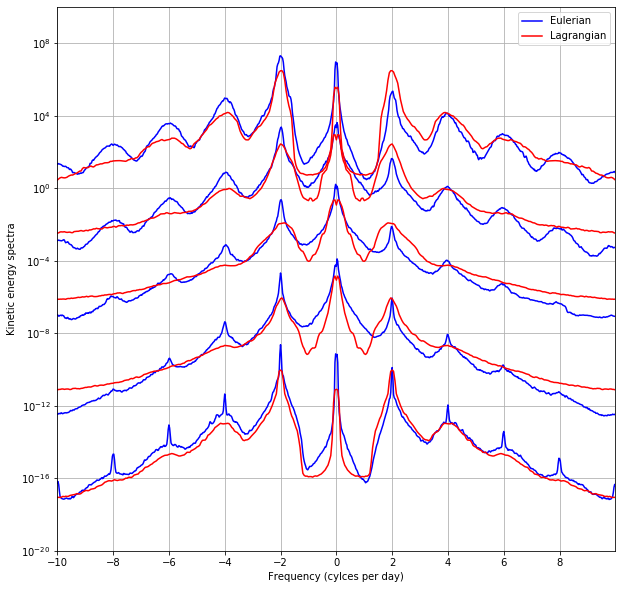

In [9]:
axis = {'axes' : 'frequency','xlim':(-10,10),'ylim':(1e-20,1e10),
        'ylabel':'Kinetic energy spectra','xlabel':'Frequency (cylces per day)','yscale':'log'}
ELcomparaison(i_y,file.E_spectra,file.L_spectra,(10,10),axis,10000,'')

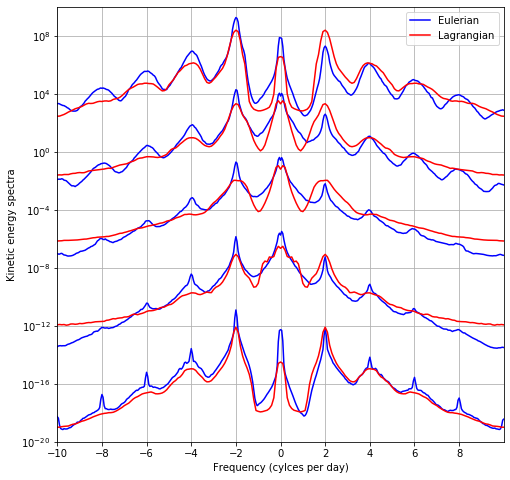

In [11]:
ELcomparaison(i_y,file2.E_spectra,file2.L_spectra,(8,8),axis,100000,'Comp_EluerLagr.png',offline=True)


In [82]:
Esanstide = xr.open_dataset(path + 'Espectra40.nc')
Lsanstide = xr.open_dataset(path + 'Lspectra40.nc')
Lsanstide_bis = xr.open_dataset(path + 'Lspectra40_bis.nc')

In [43]:
Esanstide.__xarray_dataarray_variable__

<xarray.DataArray '__xarray_dataarray_variable__' (y_rho: 145, freq_time: 2879)>
[417455 values with dtype=float64]
Coordinates:
    f_rho         (y_rho) float32 ...
    f_u           (y_rho) float32 ...
    y_u           (y_rho) float32 ...
    y_v           (y_rho) float32 ...
    s_rho_slice0  float32 ...
  * y_rho         (y_rho) float32 -2000.0 18000.0 ... 2858000.0 2878000.0
    f_v           (y_rho) float32 ...
  * freq_time     (freq_time) float64 -71.97 -71.92 -71.87 ... 71.87 71.92 71.97
Attributes:
    Window:          40
    Overlap:         0.5
    Fourier window:  hann
    detrend:         linear

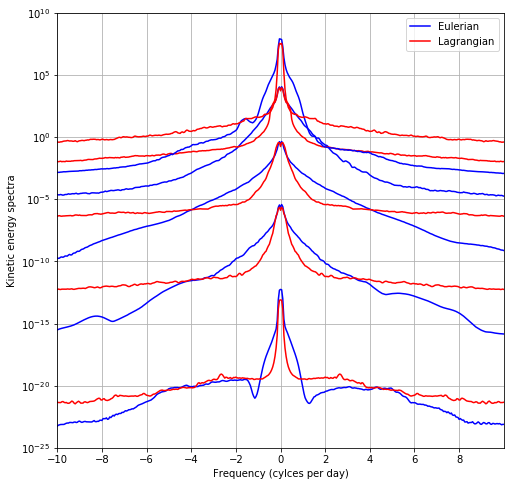

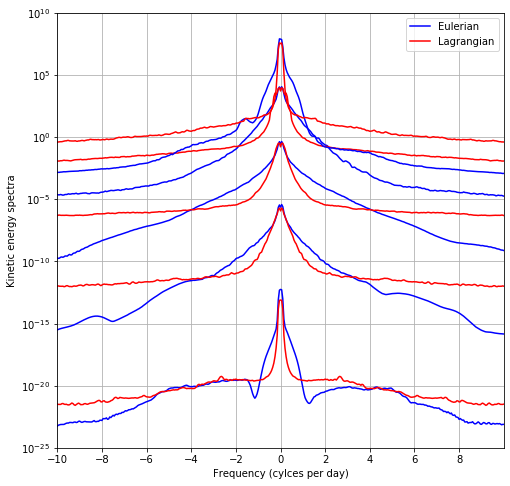

In [84]:

axis = {'axes' : 'frequency','xlim':(-10,10),'ylim':(1e-25,1e10),
        'ylabel':'Kinetic energy spectra','xlabel':'Frequency (cylces per day)','yscale':'log'}
ELcomparaison(i_y,Esanstide.__xarray_dataarray_variable__,Lsanstide_bis.Eu,(8,8),axis,100000,'sansIT.png',offline=True)
ELcomparaison(i_y,Esanstide.__xarray_dataarray_variable__,Lsanstide.Eu,(8,8),axis,100000,'sansIT.png',offline=True)



In [81]:
E = file.E_spectra
L = file.L_spectra

In [111]:
om0 = -2.
om1 = -1.5
om2 = -2.5

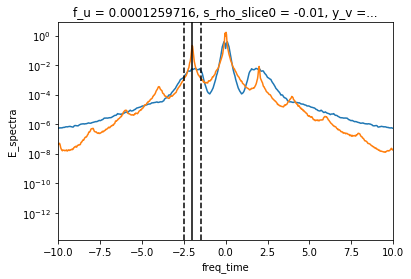

In [112]:
fig,ax = plt.subplots()
L.sel(y_bins=1425).plot.line(x='frequency',xlim=(-10,10),yscale='log')
E.sel(y_rho=1425*1000,method='nearest').plot.line(x='freq_time',xlim=(-10,10),yscale='log')
ax.axvline(x=om0,c='k');ax.axvline(x=om1,c='k',linestyle='--');ax.axvline(x=om2,c='k',linestyle='--')

In [115]:
Li = L.sel(frequency=slice(om2,om1)).sel(y_bins=1425)
Ei = E.sel(freq_time=slice(om2,om1)).sel(y_rho=1425*1000,method='nearest')

In [119]:
print(Li.sum(),Ei.sum())
print('loss :', Li.sum()/Ei.sum())

<xarray.DataArray 'L_spectra' ()>
array(0.09205322)
Coordinates:
    y_bins        float64 1.425e+03
    s_rho_slice0  float32 ... <xarray.DataArray 'E_spectra' ()>
array(1.03552213)
Coordinates:
    f_u           float32 ...
    s_rho_slice0  float32 ...
    y_v           float32 ...
    y_rho         float32 1418000.0
    f_rho         float32 ...
    f_v           float32 ...
    y_u           float32 ...
loss : <xarray.DataArray ()>
array(0.08889546)
Coordinates:
    y_bins        float64 1.425e+03
    s_rho_slice0  float32 -0.01
    f_u           float32 ...
    y_v           float32 ...
    y_rho         float32 1418000.0
    f_rho         float32 ...
    f_v           float32 ...
    y_u           float32 ...


In [63]:
Sp = file.E_spectra.sel(freq_time=slice(0,None))
Sm = file.E_spectra.sel(freq_time=slice(None,0))

r_coef = (Sp.values-Sm.values)/(Sm.values+Sp.values)
r_coef.shape
f=file.E_spectra.freq_time
fabs = f[f>=0]

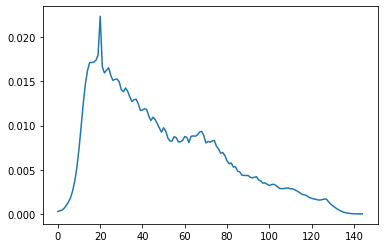

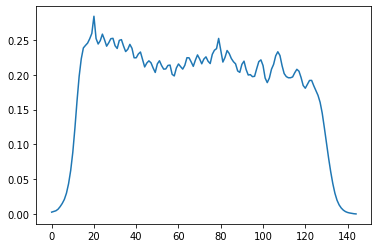

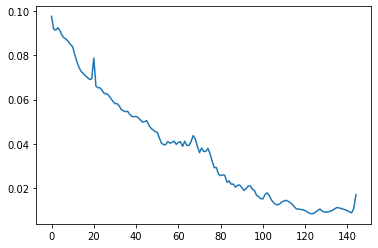

In [65]:
plt.plot(Sp.sel(freq_time=2,method='nearest'))
plt.figure()
plt.plot(Sm.sel(freq_time=-2,method='nearest'))
plt.figure()
plt.plot((Sp.sel(freq_time=2,method='nearest')/Sm.sel(freq_time=-2,method='nearest')))

In [5]:
###Correlation : 
corr1 = xr.open_dataset(path+'corr_20.nc')
corr2 = xr.open_dataset(path+'corr_40.nc')
corr3 = xr.open_dataset(path+'corr_60.nc')

In [6]:
corr1['L_corr'] = (corr1['L_corr']/corr1['L_corr'].sel(lag=0))
corr2['L_corr'] = (corr2['L_corr']/corr2['L_corr'].sel(lag=0))
corr3['L_corr'] = (corr3['L_corr']/corr3['L_corr'].sel(lag=0))

In [7]:
corr1['E_corr'] = (corr1['E_corr']/corr1['E_corr'].sel(lags=0))
corr2['E_corr'] = (corr2['E_corr']/corr2['E_corr'].sel(lags=0))
corr3['E_corr'] = (corr3['E_corr']/corr3['E_corr'].sel(lags=0))

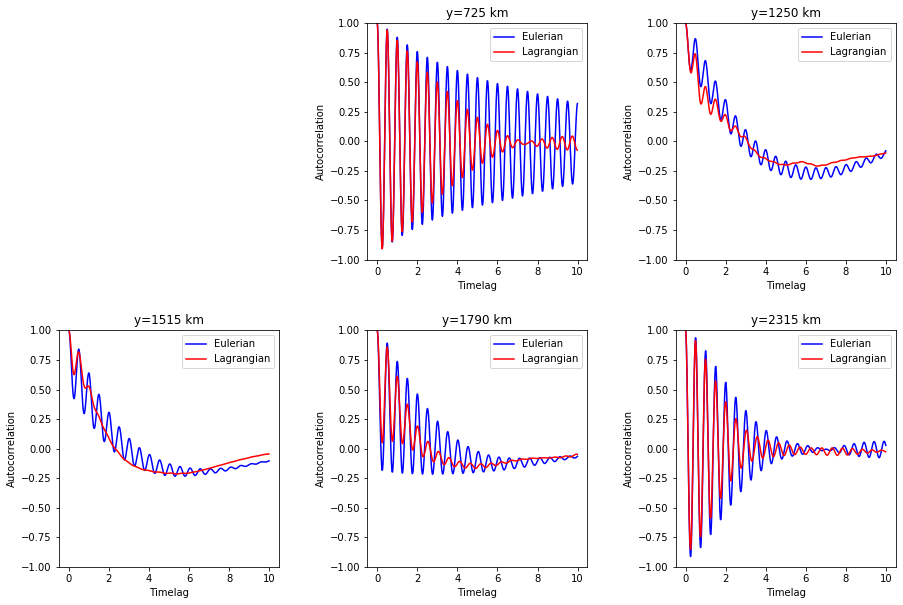

In [8]:
axis_corr = {'axes' : 'lag','xlim':None,'ylim':(-1,1),
        'ylabel':'Autocorrelation','xlabel':'Timelag','yscale':'linear'}
fig_ELcomp(i_y,corr1.L_corr,corr1.E_corr,(15,10),axis_corr,'/Users/zcaspar/codes/corr20.png',offline=True)

In [9]:
def analytical_func(Ca,tau,om):
    return np.cos(om*tau)*Ca

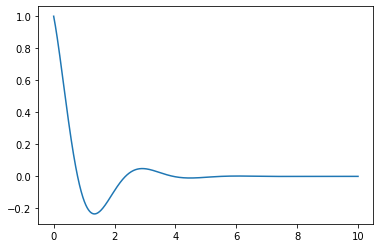

In [22]:
plt.plot(corr1.lags.values,np.cos(corr1.lags.values*2)/np.exp(corr1.lags.values))

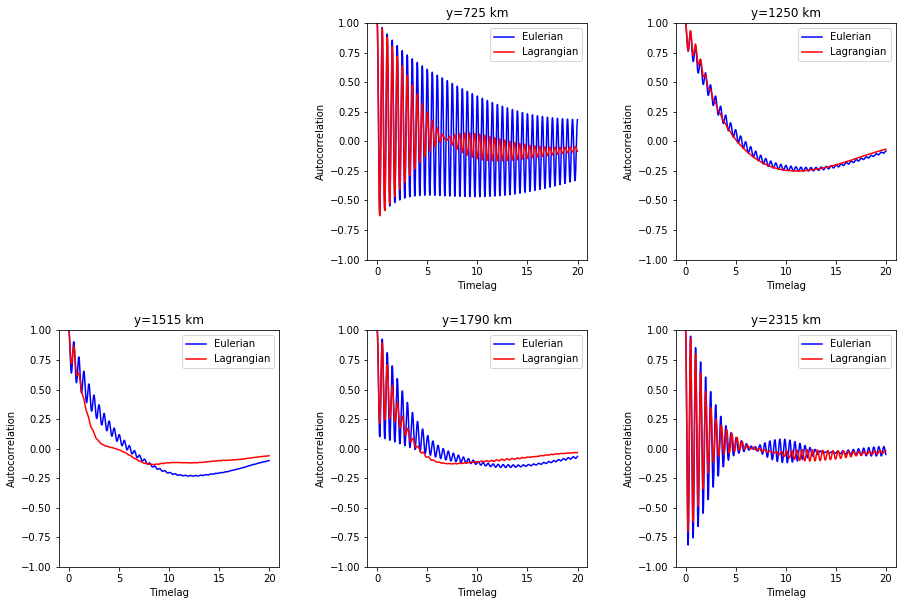

In [10]:
fig_ELcomp(i_y,corr2.L_corr,corr2.E_corr,(15,10),axis_corr,'',offline=False)

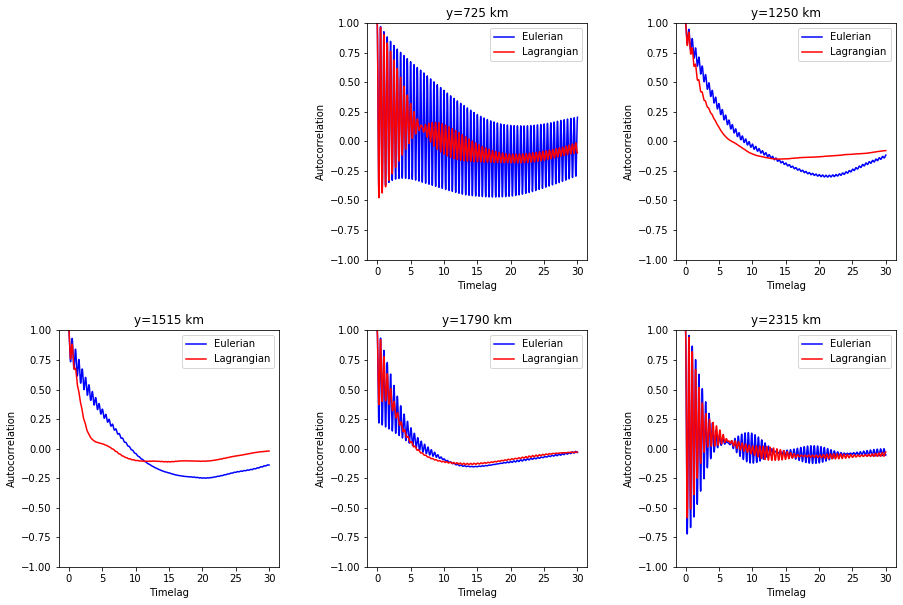

In [11]:
fig_ELcomp(i_y,corr3.L_corr,corr3.E_corr,(15,10),axis_corr,'',offline=False)

### Kinetic energy and number of drifters

In [3]:
# Energy : 
Estats = xr.open_dataset('/Users/zcaspar/codes/diags/diags/statsE.nc')
Lstats = xr.open_dataset('/Users/zcaspar/codes/diags/diags/statsL.nc')

In [4]:
Esats = Estats.reset_coords()
Estats = Estats.rename_dims({'x_u':'x_rho'})
Estats = Estats.rename_dims({'y_v':'y_rho'})

Estats = Estats.assign_coords({'y_rho':Estats.y_rho/1000,'x_rho':Estats.x_rho/1000})


In [5]:
Estats['KE_t'] = Estats.u_tmean**2+Estats.v_tmean**2
Estats['KE_x'] = Estats.u_xmean_zon**2+Estats.v_xmean_zon**2

In [6]:
Estats.KE_x

<xarray.DataArray 'KE_x' (time: 4800, y_rho: 145)>
array([[3.23891207e-08, 3.21716769e-08, 3.25458842e-08, ...,
        5.22413586e-07, 4.98592783e-07, 7.78295771e-07],
       [3.23225855e-08, 3.21698295e-08, 3.24005782e-08, ...,
        5.22281027e-07, 4.98490238e-07, 7.79036384e-07],
       [3.29682130e-08, 3.21998535e-08, 3.23284048e-08, ...,
        5.22197752e-07, 4.98420718e-07, 7.78854883e-07],
       ...,
       [1.18819073e-04, 2.65398237e-04, 2.71912053e-04, ...,
        2.89194577e-05, 2.53232320e-05, 2.11642036e-05],
       [1.71152045e-04, 2.54551996e-04, 1.23482721e-04, ...,
        2.45860447e-05, 2.31266640e-05, 1.68066908e-05],
       [1.87138183e-04, 1.44998819e-04, 1.52777880e-04, ...,
        3.14687131e-05, 2.10091039e-05, 1.38626665e-05]], dtype=float32)
Coordinates:
  * y_rho         (y_rho) float32 -2.0 18.0 38.0 58.0 ... 2838.0 2858.0 2878.0
    s_rho_slice0  float32 -0.01
    f_rho         (y_rho) float32 ...
    y_u           (y_rho) float32 ...
    f_u      

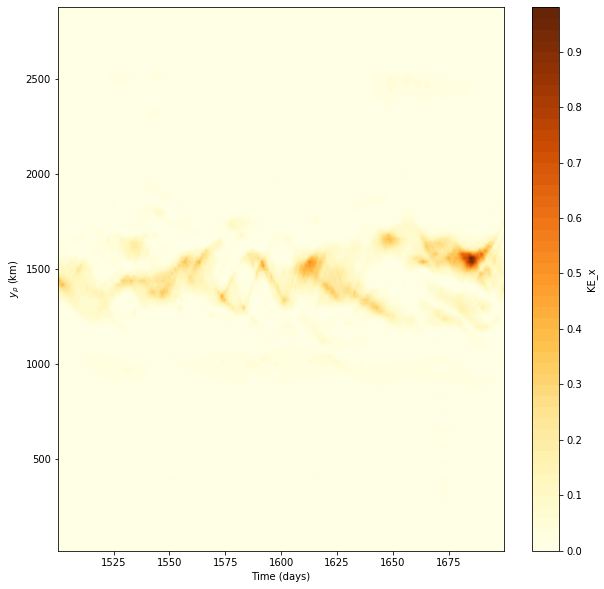

In [16]:
fig,ax = plt.subplots(figsize=(10,10))
Estats.KE_x.plot.contourf(ax=ax,y='y_rho',ylim=(Estats.y_rho[1],Estats.y_rho[-1]),levels=50,cmap='YlOrBr')
ax.set_xlabel(r'Time (days)');ax.set_ylabel(r'$y_\rho$ (km)')
ax.set_title('')
plt.savefig('/Users/zcaspar/codes/KE_euler.png')

In [9]:
Estats['KE'] = Estats.u_tmean.mean(axis=1)**2+Estats.v_tmean.mean(axis=1)**2
Lstats['KE'] = Lstats.u_mean.mean(axis=0)**2+Lstats.v_mean.mean(axis=0)**2

/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [ ]:
fig,ax = plt.subplots(figsize=(10,10))
Estats.KE.plot.contourf(ax=ax,xlim=(Estats.x_rho[1],Estats.x_rho[-1]),
                                                    ylim=(Estats.y_rho[1],Estats.y_rho[-1]),levels=50,cmap='YlOrBr')
ax.set_xlabel(r'$x_\rho$ (km)');ax.set_ylabel(r'$y_\rho$ (km)')
ax.set_aspect('equal')
ax.set_title('')

In [19]:
Estats.KE.where(Estats.KE==Estats.KE.max(),drop=True)

<xarray.DataArray 'KE' (y_rho: 1)>
array([0.08647895], dtype=float32)
Coordinates:
  * y_rho         (y_rho) float32 1538.0
    s_rho_slice0  float32 -0.01
    f_rho         (y_rho) float32 0.0001279156
    y_u           (y_rho) float32 1538000.0
    f_u           (y_rho) float32 0.0001279156
    f_v           (y_rho) float32 0.000127948
    y_v           (y_rho) float32 1540000.0

In [14]:
Ebins = Estats.sel(y_rho=i_y,method='nearest').y_rho.values
Lbins = Lstats.sel(y_bins=i_y,method='nearest').y_bins.values

In [21]:
print(Ebins,Lbins)

[ 718. 1258. 1518. 1798. 2318.] [ 735. 1245. 1515. 1785. 2325.]


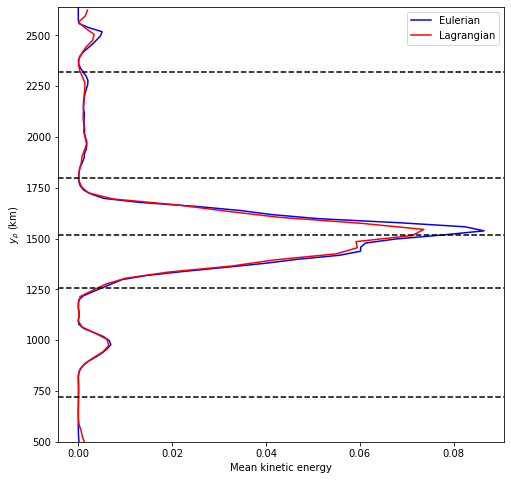

In [22]:
fig=plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
Estats.KE.plot(c='b',y='y_rho',ax=ax,ylim=(500,2640),label='Eulerian')
Lstats.KE.plot(c='r',y='y_bins',ax=ax,ylim=(500,2640),label='Lagrangian')
ax.set_ylabel(r'$y_\rho$ (km)');ax.set_xlabel('Mean kinetic energy')
ax.set_title('')
for i in Ebins:
    ax.axhline(y=i,c='k',linestyle='--')
#ax = fig.add_subplot(1,2,2)
#Lstats.KE.plot(y='y_bins',ax=ax,ylim=(500,2640))
#ax.set_ylabel('');ax.set_xlabel('Mean kinetic energy')
#ax.set_title('');ax.set_yticklabels('')
#for i in Lbins:
#    ax.axhline(y=i,c='k',linestyle='--')
plt.legend()
plt.savefig('/Users/zcaspar/codes/KE_EL.png')

In [161]:
Lstats.KE.y_bins.min(),Lstats.KE.y_bins.max()

(<xarray.DataArray 'y_bins' ()>
 array(15.), <xarray.DataArray 'y_bins' ()>
 array(2775.))

In [29]:
print('Max KE lagrangian',Lstats.KE.max(),'Max KE eulerian',Estats.KE.max())
print('Diff = ',np.abs(Lstats.KE.max().values-Estats.KE.max().values))

Max KE lagrangian <xarray.DataArray 'KE' ()>
array(0.0736368) Max KE eulerian <xarray.DataArray 'KE' ()>
array(0.08647895, dtype=float32)
Coordinates:
    s_rho_slice0  float32 -0.01
Diff =  0.012842150957679488


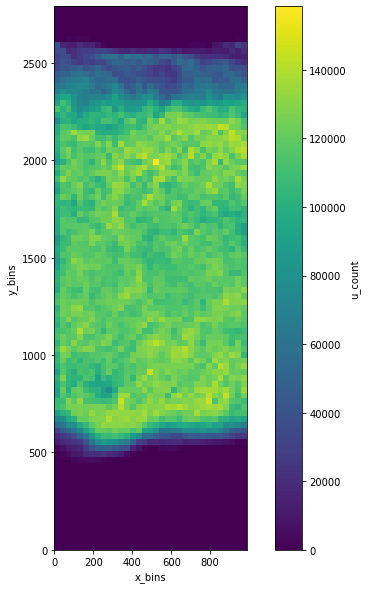

In [7]:
#Number of drifters by bin
fig,ax = plt.subplots(figsize=(10,10))
Lstats.u_count.plot(ax=ax,y='y_bins')
ax.set_aspect('equal')

<xarray.DataArray 'u_count' (y_bins: 5)>
array([126700.78787879, 119082.3030303 , 114575.57575758, 113869.36363636,
        72440.87878788])
Coordinates:
  * y_bins   (y_bins) float64 735.0 1.245e+03 1.515e+03 1.785e+03 2.325e+03


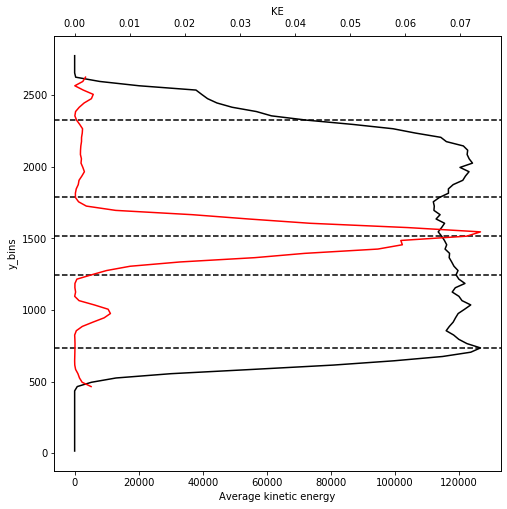

In [17]:
fig,ax = plt.subplots(figsize=(8,8))
Lstats.u_count.mean(axis=0).plot(ax=ax,y='y_bins',c='k')
ax.set_xlabel('Average number of drifters by bin')
ax.twiny()
Lstats.KE.plot(y='y_bins',c='r')
ax.set_xlabel('Average kinetic energy')
for i in Lbins:
    ax.axhline(y=i,c='k',linestyle='--')

print(Lstats.u_count.mean(axis=0).sel(y_bins=Lbins))

### Comments:
Little less drifters in and near the jet than far from the jet. Nothing that seems big ($\sim$120000 north and south and $\sim$>110000 in and near the jet).
Lets note the fast decrease toward zero for $\sim$y>2100km and $\sim$y<750km.